4/18/21: Got to the point where I'm going to train a PET model,  should take a few hours but it's getting late so I'm just going to let that run and upload the results tomorrow. If you're reading this now feel free to look through but expect more soon.

### Imports

In [1]:
# !pip install ipywidgets --user

In [115]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from tqdm import tqdm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
tqdm.pandas()

### Load in data

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [4]:
newsgroups_test= fetch_20newsgroups(subset='test')

Making sure that the data lengths match up with what's on http://qwone.com/~jason/20Newsgroups/

In [5]:
len(newsgroups_train['data'])

11314

In [6]:
len(newsgroups_test['data'])

7532

In [7]:
11314 + 7532

18846

Looks good!

Next going to do some basic EDA on the training set

## EDA

In [8]:
print(newsgroups_train['data'][5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [9]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [10]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
newsgroups_train['target']

array([7, 4, 4, ..., 3, 1, 8])

In [12]:
newsgroups_train['target'].shape

(11314,)

Well this looks useful...

In [155]:
# Commented out to reduce notebook length, pasted part of interest in markdown
# print(newsgroups_train['DESCR'])

## Output of interest in DESCR:
## "
>### Filtering text for more realistic training
>----------------------------------------------
>
>It is easy for a classifier to overfit on particular things that appear in the
>20 Newsgroups data, such as newsgroup headers. Many classifiers achieve very
>high F-scores, but their results would not generalize to other documents that
>aren't from this window of time.
>
>For example, let's look at the results of a multinomial Naive Bayes classifier,
>which is fast to train and achieves a decent F-score::
>
  >>> from sklearn.naive_bayes import MultinomialNB
  >>> from sklearn import metrics
  >>> newsgroups_test = fetch_20newsgroups(subset='test',
 > ...                                      categories=categories)
  >>> vectors_test = vectorizer.transform(newsgroups_test.data)
  >>> clf = MultinomialNB(alpha=.01)
  >>> clf.fit(vectors, newsgroups_train.target)
 > MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
>
  >>> pred = clf.predict(vectors_test)
  >>> metrics.f1_score(newsgroups_test.target, pred, average='macro')
  >0.88213...
>
>(The example :ref:`sphx_glr_auto_examples_text_plot_document_classification_20newsgroups.py` shuffles
>the training and test data, instead of segmenting by time, and in that case
>multinomial Naive Bayes gets a much higher F-score of 0.88. Are you suspicious
>yet of what's going on inside this classifier?)
>
>Let's take a look at what the most informative features are:
>
  >>> import numpy as np
  >>> def show_top10(classifier, vectorizer, categories):
  >...     feature_names = np.asarray(vectorizer.get_feature_names())
  >...     for i, category in enumerate(categories):
  >...         top10 = np.argsort(classifier.coef_[i])[-10:]
  >...         print("%s: %s" % (category, " ".join(feature_names[top10])))
  >...
  >>> show_top10(clf, vectorizer, newsgroups_train.target_names)
  >alt.atheism: edu it and in you that is of to the
  >comp.graphics: edu in graphics it is for and of to the
  >sci.space: edu it that is in and space to of the
  >talk.religion.misc: not it you in is that and to of the
>
>
>You can now see many things that these features have overfit to:
>
>- Almost every group is distinguished by whether headers such as
>  ``NNTP-Posting-Host:`` and ``Distribution:`` appear more or less often.
>- Another significant feature involves whether the sender is affiliated with
>  a university, as indicated either by their headers or their signature.
>- The word "article" is a significant feature, based on how often people quote
>  previous posts like this: "In article [article ID], [name] <[e-mail address]>
>  wrote:"
>- Other features match the names and e-mail addresses of particular people who
>  were posting at the time.
>
>With such an abundance of clues that distinguish newsgroups, the classifiers
>barely have to identify topics from text at all, and they all perform at the
>same high level.
>
>For this reason, the functions that load 20 Newsgroups data provide a
>parameter called **remove**, telling it what kinds of information to strip out
>of each file. **remove** should be a tuple containing any subset of
>``('headers', 'footers', 'quotes')``, telling it to remove headers, signature
>blocks, and quotation blocks respectively.
>
 > >>> newsgroups_test = fetch_20newsgroups(subset='test',
  >...                                      remove=('headers', 'footers', 'quotes'),
  >...                                      categories=categories)
  >>> vectors_test = vectorizer.transform(newsgroups_test.data)
  >>> pred = clf.predict(vectors_test)
  >>> metrics.f1_score(pred, newsgroups_test.target, average='macro')
  >0.77310...
>
>This classifier lost over a lot of its F-score, just because we removed
>metadata that has little to do with topic classification.
>It loses even more if we also strip this metadata from the training data:
>
 > >>> newsgroups_train = fetch_20newsgroups(subset='train',
  >...                                       remove=('headers', 'footers', 'quotes'),
  >...                                       categories=categories)
 > >>> vectors = vectorizer.fit_transform(newsgroups_train.data)
  >>>> clf = MultinomialNB(alpha=.01)
  >>>> clf.fit(vectors, newsgroups_train.target)
  >MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
>
  >>>> vectors_test = vectorizer.transform(newsgroups_test.data)
  >>>> pred = clf.predict(vectors_test)
  >>>> metrics.f1_score(newsgroups_test.target, pred, average='macro')
  >0.76995...
>
>Some other classifiers cope better with this harder version of the task. Try
>running :ref:`sphx_glr_auto_examples_model_selection_grid_search_text_feature_extraction.py` with and without
>the ``--filter`` option to compare the results.  
## "

Some useful information from the value of `newsgroups_train['DESCR']`.

Although, I'm a little confused by the output of their "show_top_10" function. They say "You can now see many things that these features have overfit to:" but then what they list doesn't seem to match up with their example output, so while I believe what they're talking about is likely true I'm going to re-run their code just to have a better understanding of what they're talking about.

In [14]:
# Note that none of this is my code, just rerunning what they did to see what they're seeing:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

print('Average vector nnz: {}'.format(str(vectors.nnz / vectors.shape[0])))
print('TFIDF Matrix Density: {}'.format(str(vectors.nnz / (vectors.shape[0] * vectors.shape[1]))))

vectors_test = vectorizer.transform(newsgroups_test.data)

clf = MultinomialNB(alpha=0.01)
clf.fit(vectors, newsgroups_train.target)

pred = clf.predict(vectors_test)
f1_score = metrics.f1_score(newsgroups_test.target, pred, average='macro')
print('F1 Score: {}'.format(f1_score))

Average vector nnz: 157.9958458546933
TFIDF Matrix Density: 0.001214353154362896
F1 Score: 0.8290659644474043


I got a different F1 score, I presume that's because I didn't remove any categories

In [15]:
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: keith it and you in that is to of the
comp.graphics: edu in for it is and graphics of to the
comp.os.ms-windows.misc: file for of and edu is it to the windows
comp.sys.ibm.pc.hardware: card ide is of it drive and scsi to the
comp.sys.mac.hardware: in it is and of edu apple mac to the
comp.windows.x: it mit in motif and is of window to the
misc.forsale: shipping offer of 00 to and edu the for sale
rec.autos: that is you it in of and to car the
rec.motorcycles: dod you it com in of and bike to the
rec.sport.baseball: that is baseball and of in to he edu the
rec.sport.hockey: ca game he team and hockey of in to the
sci.crypt: chip that encryption is and clipper key of to the
sci.electronics: for edu you it in is and of to the
sci.med: edu pitt that it in and is to of the
sci.space: it that is nasa in and to of space the
soc.religion.christian: we it in and is god that to of the
talk.politics.guns: it is you that gun and in of to the
talk.politics.mideast: is you israeli that 

Okay... so I'm admittedly a bit confused because these results look the same as they had before xD

To whoever is reading this, this is the part in ``DESCR`` that is throwing me off:  

>"You can now see many things that these features have overfit to:

>- Almost every group is distinguished by whether headers such as
  ``NNTP-Posting-Host:`` and ``Distribution:`` appear more or less often.
>- Another significant feature involves whether the sender is affiliated with
  a university, as indicated either by their headers or their signature.
>- The word "article" is a significant feature, based on how often people quote
  previous posts like this: "In article [article ID], [name] <[e-mail address]>
  wrote:"
>- Other features match the names and e-mail addresses of particular people who
  were posting at the time."

Okay upon re-reading, it's the way that they're switching the contexts at which they're using the word "feature" here that's throwing me off. In some cases they're directly referring to tokens, in others they're talking more abstractly. 

Here's what I'm getting from this output:

- I do see some problems with overfitting, for example in `alt.atheism` one of the most "informative" tokens according to NB is "keith" which lines up with what they're saying about names and email addresses. 

- I see a lot of stop words as the top features which makes sense because it is NB afterall and we didn't prune the stop words. It seems that these "informative" tokens are just the most likely token given the class, which has an obvious frequency bias. (Just looked up what `MultinomialNB.coef_` is in sklearn docs) `coef_` is equivalent to another attr `feature_log_prob_`. So these tokens are in fact just $P(token_i|class_k)$. 

I've decided that I don't really like their approach to analyzing what NB is finding. They're describing these tokens as the "most informative features" but is $P(token_i|class_k)$ really a good measure of how "informative" a token is for the class? I don't personally think so, so I'm going to use Bayes Theorem to calculate `P(class|token)` to get a better idea of what NB is finding in absent of frequency bias.

## Bayes Theorem!
So in this section I'm going to calculate $P(class_k|token_i)$ for all classes and tokens, then make another ``show_top10`` function that prints token importances according to that to see what comes back out.

First going to verify that sklearn didn't do anything funky to the probabilities, should be able to just np.exp it and it should add up to ~20

In [16]:
np.sum(np.exp(clf.feature_log_prob_))

20.00000000000001

Seems good me! Let's check the class probabilities now, should add up to 1

In [17]:
np.sum(np.exp(clf.class_log_prior_))

0.9999999999999998

Great!

As a reminder, we're trying to calculate this:  

$P(class_k|token_i) = \frac{P(token_i|class_k) P(class_k)}{P(token_i)}$

where $P(token_i) = \sum_{k}^{n}{P(token_i|class_k) P(class_k)}$

Here's how we calculate the individual elements:  
``np.exp(clf.coef_)`` = ``np.exp(clf.feature_log_prob_)`` = $P(token_i|class_k)$  
``np.exp(clf.class_log_prior_)`` = $P(class_k)$  
``np.sum(np.multiply(token_given_class_probs.T, class_probs).T, axis=0)`` =  $\sum_{k}^{n}{P(token_i|class_k) P(class_k)} = P(token_i)$

Let's put it all together now

In [18]:
def get_class_given_tokens_probs(classifier):
    token_given_class_probs = np.exp(classifier.feature_log_prob_)
    class_probs = np.exp(classifier.class_log_prior_)
    token_probs = np.sum(np.multiply(token_given_class_probs.T, class_probs).T, axis=0)
    return np.multiply(np.multiply(token_given_class_probs.T, class_probs).T, np.reciprocal(token_probs))

In [19]:
class_given_token_probs = get_class_given_tokens_probs(clf)

Let's check that we did everything right and verify that class probabilities given any token adds up to 1

In [20]:
sum(class_given_token_probs[:, 1001])

1.0000000000000002

Looks good to me! Now for the new ``show_top10`` function

In [21]:
def show_top10(classifier, vectorizer, categories): 
    class_given_token_probs = get_class_given_tokens_probs(classifier)
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(class_given_token_probs[i])[-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: schneider darice benedikt snm6394 buphy mozumder rushdie beauchaine bobbe jaeger
comp.graphics: mpeg rayshade bezier tdawson radiosity 3do polygon tiff pov cview
comp.os.ms-windows.misc: ndis chicogo 2a42dubinski mathcad winqvt win3 nthu ashok ini w4wg
comp.sys.ibm.pc.hardware: penev gerhards husak tosspot harddisk t560i f550iw balog ab245 latonia
comp.sys.mac.hardware: iivx lc hades pds adb bmug powerbook iisi c650 lciii
comp.windows.x: mydisplay xputimage whaley imake xterm xdm x11r5 enterpoop widget xpert
misc.forsale: obo typewriter damico hiram snes 02106 koutd rupin radley kou
rec.autos: wrat opel mr2 wharfie awd sho automotive qazi boyle callison
rec.motorcycles: cjackson bike winona countersteering svoboda egreen moa bikes infante ranck
rec.sport.baseball: rickert clemens mets dodgers pitcher baerga rbi phillies alomar pitching
rec.sport.hockey: playoff devils ists hockey islanders hawks bruins lemieux leafs nhl
sci.crypt: wiretap toal rsa intercon amanda bontchev 

Clearly still some noise in there with mispellings and such, could probably reduce most of that by requiring a certain minimum frequency, let's do that real quick. 

In [22]:
def show_top10(classifier, vectorizer, categories): 
    class_given_token_probs = get_class_given_tokens_probs(classifier)
    # Get approximate token count from class (pretty sure they're doing some sort of smoothing or something as these numbers aren't whole)
    token_frequencies = np.sum(clf.feature_count_, axis=0)
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        argsorted = np.argsort(class_given_token_probs[i])
        
        # Use np.in1d on arrays of indices to check if there's overlap with array of indices that have a minimum of 10 occurrences
        top10 = argsorted[np.in1d(argsorted, np.argwhere(token_frequencies > 10).flatten())][-10:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: caltech cco morality keith islamic islam atheists wpd atheism livesey
comp.graphics: package vga 256 library format gif image images graphics 3d
comp.os.ms-windows.misc: dos ms microsoft driver drivers diamond font nt windows ax
comp.sys.ibm.pc.hardware: port floppy gateway motherboard 486 scsi bus controller isa ide
comp.sys.mac.hardware: mhz internal meg se upgrade dartmouth simms apple mac quadra
comp.windows.x: event mit tu application server window motif xterm x11r5 widget
misc.forsale: sell excellent includes 00 brand asking condition offer shipping sale
rec.autos: lehigh honda auto saturn ford oil engine dealer car cars
rec.motorcycles: nec honda bmw dog ride riding dod motorcycle bike bikes
rec.sport.baseball: season hall stats fans hit players runs ball baseball braves
rec.sport.hockey: montreal gld gerald detroit wings rangers espn hockey leafs nhl
sci.crypt: secure des pgp privacy nsa clipper encryption gtoal crypto escrow
sci.electronics: electrical nuclear ee 

That looks a lot better! I think it does a much better job at capturing which kinds of tokens really define the topic. We probably could have arrived at this set via TF-IDF as well but this is just as good. We can still see some of the issues though, with certain names of users really defining a particular topic. "keith" still seems to be a pretty noticable problem for NB in the atheism topic for example.

As an example of a topic that this looks really good to me is the ``talk.politics.mideast``, I imagine that even possibly on a more modern text set that this model might still perform OK at identifying that topic. ``talk.politics.mist`` seems pretty out of date by comparison, but I guess the name Clinton even today probably still comes up quite a bit. I am curious about the "Cramer" and "Optilink" keywords though as I'm unsure what that's related to, so I'm going to print out some examples that contain those keywords.

In [23]:
optilink_docs = [x for x in newsgroups_train['data'] if 'optilink' in x.lower()]
cramer_docs = [x for x in newsgroups_train['data'] if 'cramer' in x.lower()]

In [24]:
print(optilink_docs[0])

From: cramer@optilink.COM (Clayton Cramer)
Subject: Re: New Study Out On Gay Percentage
Organization: Optilink Corporation, Petaluma, CA
Lines: 19

In article <C5L0v1.JCv@news.cso.uiuc.edu>, dans@uxa.cso.uiuc.edu (Dan S.) writes:
> Don't forget about the culture.  Sadly, we don't (as a society) look upon
> homosexuality as normal (and as we are all too well aware, there are alot
> of people who condemn it).  As a result, the gay population is not encouraged
> to develop "non-promiscuous" relationships.  In fact there are many roadblocks
> put in the way of such committed relationships.  It is as if the heterosexual

Such as?  Not being able to get married isn't a roadblock to a permanent
relationship.  Lack of a marriage certificate doesn't force a couple
to break up.  This is an excuse used by homosexuals because the 
alternative is to ask why they are so much more promiscuous than 
straights.

> Dan


-- 
Clayton E. Cramer {uunet,pyramid}!optilink!cramer  My opinions, all mine!
Relat

In [25]:
print(cramer_docs[1])

From: cramer@optilink.COM (Clayton Cramer)
Subject: Re: New Study Out On Gay Percentage
Organization: Optilink Corporation, Petaluma, CA
Lines: 31

In article <1993Apr16.164638.27218@galileo.cc.rochester.edu>, as010b@uhura.cc.rochester.edu (Tree of Schnopia) writes:
> In <15378@optilink.COM> cramer@optilink.COM (Clayton Cramer) writes:
# #The article also contains numbers on the number of sexual partners.
# #The median number of sexual partners for all men 20-39 was 7.3.
# #Compared to the table I have already posted from Masters, Johnson,
# #and Kolodny showing male homosexual partners, it is apparent that
# #homosexual men are dramatically more promiscuous than the general
# #male population.  It's a shame that we don't have a breakdown for
# #straight men vs. gay/bi men -- that would show even more dramatically
# #how much more promiscuous gay/bi men are.
# 
# Possibly because gay/bi men are less likely to get married?

Marriage isn't a requirement for a couple staying together.

# 

Ahh both are just from an email address of a man who has hopefully has updated "His opinions, all his!" since writing these posts. As a side note, I think it's this kind of stuff that makes it clear why we have to be careful with how we deploy models that train on massive text datasets scraped from around the web.

I digress, the model is still clearly overfitting to the names/email addresses of frequent posters. 

If there were far more categories to classify here, I imagine that the performance would drop quite drastically, and not because a model trained on this set wouldn't necessarily be generalizing, but because of the nature of the overlap of topics might make it difficult to get things right. I imagine to achieve really high accuracy here (>=95%), without using data like the posters and such, I would have to feature engineer to make things unnaturally fit the decided classifications. For example, this guy Cramer is talking about gay marriage, I imagine that might have some overlap over in the categories about religion.

# EDA/Modeling with Masked Language Models

I could continue down the path of NB or some other simple model by removing stop words, removing sections that leak information that is bad for overfitting and such, and likely arrive somewhere with reasonable performance. 

But I've done these kinds of tasks quite a bit, but usually I don't have a fully labeled set. Thus I've gotten pretty good at exploring text data using MLMs in what I think is a cool novel approach to NLP tasks. 

Also, given how old this dataset if I'd be sad if we don't match, or at the very least come very close to SOTA, and when chasing SOTA you generally have to use a neural net, so that's what we're going to do here.

Just checked [paperswithcode](https://paperswithcode.com/sota/text-classification-on-20news), and it says that SOTA is 88.6% accuracy, so that's the goal!

Anyways, there was a really cool paper circulating around mid-last year that I've spent some time implementing for work/side projects.

Yall may have heard of it, the paper is called ["Exploiting Cloze Questions for Few Shot Text Classification and Natural Language Inference"](https://arxiv.org/pdf/2001.07676.pdf) but I refer to it just as "PET".


"PET" stands for "Pattern Exploit Training" and it includes ideas from both of the suggested papers for this challenge.
I also happen to have infrastructure already deployed to train/deploy these models so I'm going go ahead and save some time by using that xD

## Brief overview of PET:

#### Patterns and Verbalizers
The "**Pattern**" in PET refers to using a cloze statement as a way of simplifying a NLP task for a masked langugage model (MLM) such as BERT, RoBERTa, GPT-2/3, etc. 

If you're not familiar with the term "cloze statement", you're probably familiar with the concept. You may remember them from elementary school, basically a cloze statement looks something like this:

"**Somebody once told me the world is gonna roll me, I ain't the sharpest _ _ _ in the shed ...** "

And if you were living anytime after the year 1999 you would likely instantaneously fill in the blank in your mind with the word "**tool**". 

If you think back to school you may recall that a lot of these fill-in-the-blank statements were often preceded by passages of text that you had to use to correctly fill in the right answer. We're basically treating our MLM like you would a toddler and doing the same thing.

So we augment all of our data with the cloze statement, and ask the MLM to fill in it's most likely answer. But we often make it even easier for the model by actually providing it with a set of words to choose from, and mapping those words to classes that we can use to calculate error to help the model learn to pick the best fit. We call these Label -> Token mappings "**Verbalizers**". 

The paper makes a point of calling the pairs of Patterns and Verbalizers "Pattern Verbalizer Pairs" (PVPs) but in my experience using PET, you often can use multiple verbalizers or a single verbalizer for many or few patterns. You also don't necessarily even need a verbalizer for certain tasks such as text generation, but that's something I haven't personally experimented with as much.

I love this idea because it allows the modeler to be really creative in how they construct the patterns and verbalizers, it's a really natural form of feature engineering that I haven't really seen anywhere else before.

#### Yelp Example:
I found the paper's example of the Yelp dataset to be helpful in understanding what's going on:  

Yelp Review: "Best pizza ever!"   
Pattern (cloze statement): "It was _ _ _ ."  
Verbalizers: {"5 stars": "Great", "4 stars": "Good", "3 stars": "Okay", "2 stars": "Bad", "1 stars": "Terrible"}

So the model recieves "Best Pizza ever! It was _ _ _ ." as input and is asked to fill in the best answer out of:
- Great
- Good
- Okay
- Bad
- Terrible

If the real label here was "5 stars" and the model output the token "Good" then we would tell the model that the correct answer was in fact "Great".

#### Using multiple patterns/models 

Here is where the idea starts to go up a level. 

Paper says, let's not just use one pattern, but let's use multiple to give the model multiple perspectives on the same task. So we train a model per PVP, then use those models to label a larger unlabeled dataset **D**.  

We then train a final classifier on **D** without augementing the data with any patterns, but only by using the aggregate of labels from all the previous models.   

If you're familiar with [Snorkel](https://www.snorkel.org/get-started/), it reminds me a lot of some of the ideas from that except instead of using human constructed label functions you're using human supervised machine-learned label functions. Also vanilla PET's label-weighting scheme isn't as well thought out as Snorkel's.


This idea allows us to label a much larger dataset without needing that many labels, even with just 10-20 examples per class I typically see pretty good performance.

#### PET-ception (**iPET**)

The "i" in iPET stands for "iterative". So naturally what we do here is we repeat PET in stages. 
Stage 1 is basically exactly as I just described in normal PET, but instead of labeling just 1 dataset, we label N datasets, 1 for each model. But we only take the top K labels that the model is most confident about, and use that to train the next generation of models. We exclude each model's own labels from being included in the weighting of the labels for it's next dataset to prevent overfitting.  

We can repeat this process as much as we want, but the paper suggests that you pick some factor to increase the number of top k highest confidence labels to include in the next generation until you've labeled the whole dataset. Once you've labeled the whole dataset you train a final classifier as you do in the original PET.


This actually allows us to start with zero labels if we want to! Not that getting 10-20 hand labeled datapoints for each class is a problem, and it does generally perform quite a bit better even with just a few labels but still cool none-the-less. 

#### EDA with PET-esque patterns & MLMs
This is where I divert a bit from the paper as I've used PET quite a bit in practice and have developed some process around it.

What I'm going to do is take the ``transformers`` library, download and intitate a fresh RoBERTa large model, come up with some cloze statements to augment the data, and see how answers vary with different classes of documents. Normally I have to first find good examples to hand-label but we get to skip that here because we already have labels.  

So what we're going to be getting out of this is hopefully some different interesting annotations from RoBERTa that we can analyze to better understand the dataset, and if we believe the annotations are good, come up with some verbalizers that we can use to train a PET.

In [26]:
# !pip install transformers
from transformers import pipeline

In [37]:
mlm = pipeline(task='fill-mask', device=0, model='roberta-large')

Example of how to use transformers mlm pipeline:

In [38]:
mlm('Hello <mask>!')

[{'sequence': 'Hello everyone!',
  'score': 0.3271038234233856,
  'token': 961,
  'token_str': ' everyone'},
 {'sequence': 'Hello there!',
  'score': 0.12918904423713684,
  'token': 89,
  'token_str': ' there'},
 {'sequence': 'Hello Everyone!',
  'score': 0.12879636883735657,
  'token': 7632,
  'token_str': ' Everyone'},
 {'sequence': 'Hello again!',
  'score': 0.07122993469238281,
  'token': 456,
  'token_str': ' again'},
 {'sequence': 'Hello all!',
  'score': 0.03463467210531235,
  'token': 70,
  'token_str': ' all'}]

The ``<mask>`` token is specific to RoBERTa I believe. What token you have to use varies with the pretrained MLM that you choose but it all boils down to "Fill this blank in". As of right now, transformers only let's you use one mask token at a time, so all outputs are limited to single tokens.

You can also limit the tokens that the mlm has access to with the ``targets`` keyword (similar to what PET does).

(Note: For whatever reason you need to precede your target tokens with a space, pretty sure this requirement varies with the kind of pretrained model that you choose.)

In [39]:
mlm('Hello <mask>!', targets=[' world', ' Dave', ' there'])

[{'sequence': 'Hello there!',
  'score': 0.12918904423713684,
  'token': 89,
  'token_str': ' there'},
 {'sequence': 'Hello world!',
  'score': 0.011702324263751507,
  'token': 232,
  'token_str': ' world'},
 {'sequence': 'Hello Dave!',
  'score': 6.752090121153742e-05,
  'token': 4475,
  'token_str': ' Dave'}]

Note that the token probabilities don't change with what targets you choose to look for, "there" has .129 for this pattern regardless of which targets you choose to look for.'

The outputs you get are really sensitive to small changes in the pattern, for example if I change the exclamation point to a period:

In [40]:
mlm('Hello <mask>.')

[{'sequence': 'Hello there.',
  'score': 0.1809077262878418,
  'token': 89,
  'token_str': ' there'},
 {'sequence': 'Hello everyone.',
  'score': 0.16616928577423096,
  'token': 961,
  'token_str': ' everyone'},
 {'sequence': 'Hello again.',
  'score': 0.1222020760178566,
  'token': 456,
  'token_str': ' again'},
 {'sequence': 'Hello Mr.',
  'score': 0.05068979039788246,
  'token': 427,
  'token_str': ' Mr'},
 {'sequence': 'Hello Dr.',
  'score': 0.03387556970119476,
  'token': 925,
  'token_str': ' Dr'}]

This sensitivity is pretty realistic to how people actually write text in my opinion. A period after two words has a very different feel than one with an exclamation point. 

Also good to note is just how important including punctuation is:

In [41]:
mlm('Hello <mask>')

[{'sequence': 'Hello,',
  'score': 0.6458384990692139,
  'token': 6,
  'token_str': ','},
 {'sequence': 'Hello!',
  'score': 0.12907041609287262,
  'token': 328,
  'token_str': '!'},
 {'sequence': 'Hello.',
  'score': 0.025325661525130272,
  'token': 4,
  'token_str': '.'},
 {'sequence': 'Hello there',
  'score': 0.02444182150065899,
  'token': 89,
  'token_str': ' there'},
 {'sequence': 'Hello World',
  'score': 0.016941659152507782,
  'token': 623,
  'token_str': ' World'}]

Commas dominate our written word and without proper punctuation the model is very tempted to just stuff in more of them. 

Varying things like punctuation, negatives, word order, etc. in my experience is important when you only have one token to play with as it can really bias a model torwards one way or another depending on the context of what you're trying to predict.  

Okay, enough of explaining the basics now let's actually start doing some MLM-based EDA.  

I already have some intuition of where to start, the PET paper uses a clever example with the AG's News dataset that exploits common web page text formatting that categorizes pages.  

The AG News example looks something like this:

"[Category: _ _ _ ]\nPAGE TITLE HERE \nPAGE BODY HERE"


It's common enough for web pages to have that "[Category _ _ _]" tag formatting that MLMs trained on web text actually learn those patterns. 

So I'm hoping that I can come up with some similar ideas for our set. 

Let's remind ourselves of the categories:

In [42]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

So what I think I'm going to do first is try to come up with patterns that generalize to all the categories to start. I was considering writing patterns for groupings of similar topics, then making specialist patterns to distinguish after the more general group has been identified, but we will see if that is necessary.

The two patterns I want to start off with trying are these:
1. "Topic: _ _ _\nDOC-HERE"
2. "Tags: _ _ _\nDOC-HERE"


For now, I'm not going to make any verbalizers, just come up with some general patterns and see what RoBERTa spits out for different classes and look for tokens that split the classes well.

First let's get our data in a dataframe to help us organize this process a bit:

In [33]:
df = pd.DataFrame({'text': newsgroups_train['data'], 'target_int': newsgroups_train['target']})

In [34]:
df['target'] = df['target_int'].apply(newsgroups_train['target_names'].__getitem__)

This **definitely** isn't the most efficient way to score all of these, but I'm pretty hungry right now anyways so I'm going to not bother with optimizing all the Transformers-Pytorch-GPU nonsense and just let this run for a bit. It feels like every time I go to use Transformers Pipelines they have a new implementation for something anyways. Actually even while writing this notebook I noticed that they finally let you pass truncation kwargs when calling the pipeline, I used to have to do a hotfix to accomplish this.

But anywho, just going to let this run. Will probably have to optimize this later as we will likely be doing a fair amount of iteration, but maybe we will get lucky and get to avoid this.

In [44]:
topic_pattern = 'Topic: <mask>\n{}'

df['topic_pattern'] = df['text'].progress_apply(lambda doc: mlm(topic_pattern.format(doc), truncation="longest_first", max_length=512))

In [45]:
tags_pattern = 'Tags: <mask>\n{}'
df['tags_pattern'] = df['text'].progress_apply(lambda doc: mlm(tags_pattern.format(doc), truncation="longest_first", max_length=512))

Finished! So now we're just trying to find words that split the targets well.

First going to flatten the tokens into a series of lists, then grab the unique tokens to see how many there are. If it's a small number sometimes you can get away just pruning them out yourself.

In [60]:
df['topic_patten_output_tokens'] = df['topic_pattern'].apply(lambda l: [d['token_str'].strip() for d in l])
df['tags_patten_output_tokens'] = df['tags_pattern'].apply(lambda l: [d['token_str'].strip() for d in l])

In [62]:
df[['topic_patten_output_tokens','tags_patten_output_tokens', 'target']]

,topic_patten_output_tokens,tags_patten_output_tokens,target
0,"[Car, Cars, Vehicle, car, Auto]","[</s>, Car, car, Cars, 1]",rec.autos
1,"[Clock, Upgrade, Discussion, SI, Update]","[SI, clock, Clock, </s>, upgrade]",comp.sys.mac.hardware
2,"[PB, Hardware, FAQ, Feedback, Questions]","[</s>, PB, FAQ, PR, Wikipedia]",comp.sys.mac.hardware
3,"[Abstract, News, Comments, Discussion, Communi...","[</s>, news, comments, Comments, mail]",comp.graphics
4,"[NASA, Space, Discussion, Science, Discuss]","[</s>, NASA, Shuttle, launch, shuttle]",sci.space
...,...,...,...
11309,"[Discuss, , Discussion, ****, discussion]","[, Reply, </s>, reply, 1]",sci.med
11310,"[Help, Hardware, Technology, Discussion, Tech]","[</s>, Mac, Apple, Software, screen]",comp.sys.mac.hardware
11311,"[Discussion, Hardware, Miscellaneous, Feedback...","[</s>, Hardware, mail, CPU, Linux]",comp.sys.ibm.pc.hardware
11312,"[Sphere, sphere, Discuss, Discussion, Feedback]","[</s>, Sphere, sphere, email, 1]",comp.graphics


In [70]:
pd.Series([x.lower() for l in df['topic_patten_output_tokens'].tolist() for x in l]).value_counts()

discussion       8418
discuss          3725
miscellaneous    3708
feedback         2428
news             2307
                 ... 
arguments           1
leafs               1
rand                1
vm                  1
sexual              1
Length: 1817, dtype: int64

Okay, so 1800 seems like a lot to do by hand, if it were somewhere between 100-300 I'd consider it but it's probably smarter to come up with an automagic way of doing this.

Real quick, before we do that, let's get an idea of how big the tail is here, maybe we could get away with just lopping it off.

In [72]:
s = pd.Series([x.lower() for l in df['topic_patten_output_tokens'].tolist() for x in l]).value_counts()
s[s >= 10]

discussion       8418
discuss          3725
miscellaneous    3708
feedback         2428
news             2307
                 ... 
cr                 10
schedule           10
relationship       10
revelations        10
azerbaijan         10
Length: 380, dtype: int64

A bit more reasonable! But I still don't feel like doing that manually, esp. with how many topics there are. Also considering why I'm doing this challenge I probably should accomplish this more analytically somehow xD. 

I'm trying to think of some metric that uses the frequency of the token in different topics to figure out which ones are the most niche to any given topic. My brain tells me that there already is a good metric out there for this, but in this case I think it's going to be pretty easy for us to come up with a ratio ourselves.

I want tokens that commonly appear in one topic to be weighed higher, and I want tokens tokens that appear frequently appear in many topics to be pruned out. 

I have some ideas but let's first lay out the variables I'm thinking of potentially playing with here:

Token = $k_n$ where $k_n \in K$   
Topic = $t_n$ where $t_n \in T$  
Set of Documents that are labeled with $k_n$ = $D_{k_n}$ where $D_{k_n} \subset{D}$  
Set of Documents that belong to topic $t_n$ = $D_{t_n}$ where $D_{t_n} \subset{D}$  
Token <-> Topic Frequency  = $\mid D_{k_i}\cap D_{t_j} \mid$  
Set of Unique Topics that token $k_n$ appears in = $T_{k_n}$  

So intuitively, first thought is we can try something like:  
$f(k_n) = \frac{\mid D_{k_n} \mid}{\mid T_{k_n} \mid}$

So here our metric is just frequency of the token divided by the number of unique topics that token appears in. 

But in that case large counts of common tokens could potentially still dwarf more niche tokens that appear less frequently. 
I really want a natural way of punishing tokens that appear in many topics. 

~But for science let's try it real quick.~ [**EDIT:** Scratch trying this, after some later exploration I'm going straight into the thing I actually want to do]

In [108]:
# Sorry for all the wicked messy oneliners, but I'm going for quick and dirty

# Token counts
topic_pattern_token_counts = dict(pd.Series([x.lower() for l in df['topic_patten_output_tokens'].tolist() for x in l]).value_counts())
tags_pattern_token_counts = dict(pd.Series([x.lower() for l in df['tags_patten_output_tokens'].tolist() for x in l]).value_counts())

# Target counts
target_counts = dict(df['target'].value_counts())

# Token <-> Topic Frequencies
topic_pattern_target_token_counts = dict(pd.Series([y for z in (df['target'].apply(lambda t: [t]) + df['topic_patten_output_tokens']).apply(lambda l: [(l[0], x.lower()) for x in l[1:]]).tolist() for y in z]).value_counts())
tags_pattern_target_token_counts = dict(pd.Series([y for z in (df['target'].apply(lambda t: [t]) + df['tags_patten_output_tokens']).apply(lambda l: [(l[0], x.lower()) for x in l[1:]]).tolist() for y in z]).value_counts())

# Unique topics by token
topic_pattern_token2unique_targets = {s:[t[0] for t in topic_pattern_target_token_counts.keys() if s == t[1]] for s in topic_pattern_token_counts.keys()}
tags_pattern_token2unique_targets = {s:[t[0] for t in tags_pattern_target_token_counts.keys() if s == t[1]] for s in tags_pattern_token_counts.keys()}

I want to plot out the # of unique targets per token real quick to see just how niche tokens are on average at the moment

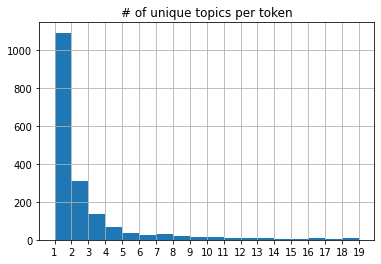

In [120]:
ax = pd.Series(list(map(len, topic_pattern_token2unique_targets.values()))).hist(bins=np.arange(1, 20, 1))
ax.set_xticks(np.arange(1, 20, 1))
ax.set_title('# of unique topics per token')
plt.show()

At first glance that doesn't look too bad I guess, but I think that it's currently being carried by the low frequency tail, let's validate that...

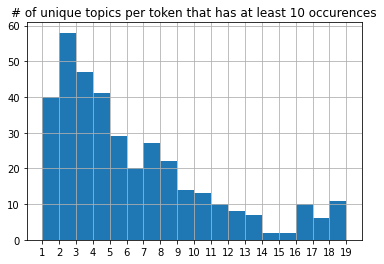

In [126]:
ax = pd.Series(list(map(len, [v for k,v in topic_pattern_token2unique_targets.items() if topic_pattern_token_counts[k]>=10]))).hist(bins=np.arange(1, 20, 1))
ax.set_xticks(np.arange(1, 20, 1))
ax.set_title('# of unique topics per token that has at least 10 occurences')
plt.show()

Yeah that's what I thought. Granted, these unique topics could still be rare occurences. Let's inspect one real quick.

In [156]:
df[df['topic_patten_output_tokens'].apply(lambda l: 'hockey' in [x.lower() for x in l])].target.value_counts()

rec.sport.hockey      509
rec.sport.baseball      8
rec.motorcycles         1
Name: target, dtype: int64

Okay so that actually looks pretty good, but it looks like RoBERTa labeled documents some topics under baseball and motorcycles with the "hockey" token, so going to look at a few of those. 

This next one's real topic is ``rec.sport.baseball``:

In [160]:
print("RoBERTa's output: {}\n".format(df[df['topic_patten_output_tokens'].apply(lambda l: 'hockey' in [x.lower() for x in l]) & df['target'].isin(['rec.motorcycles', 'rec.sport.baseball'])].iloc[0].topic_patten_output_tokens))
print('Document:')
print(df[df['topic_patten_output_tokens'].apply(lambda l: 'hockey' in [x.lower() for x in l]) & df['target'].isin(['rec.motorcycles', 'rec.sport.baseball'])].iloc[0].text.strip())

RoBERTa's output: ['Sports', 'Discussion', 'Hockey', 'Letters', 'Baseball']

Document:
From: cs902043@ariel.yorku.ca (SHAWN LUDDINGTON)
Subject: Re: Jack Morris
Organization: York University, Toronto, Canada
Lines: 40

In article <1993Apr18.032345.5178@cs.cornell.edu> tedward@cs.cornell.edu (Edward [Ted] Fischer) writes:
>In article <1993Apr18.030412.1210@mnemosyne.cs.du.edu> gspira@nyx.cs.du.edu (Greg Spira) writes:
>>Howard_Wong@mindlink.bc.ca (Howard Wong) writes:
>>
>>>Has Jack lost a bit of his edge? What is the worst start Jack Morris has had?
>>
>>Uh, Jack lost his edge about 5 years ago, and has had only one above
>>average year in the last 5.
>
>Again goes to prove that it is better to be good than lucky.  You can
>count on good tomorrow.  Lucky seems to be prone to bad starts (and a
>bad finish last year :-).
>
>(Yes, I am enjoying every last run he gives up.  Who was it who said
>Morris was a better signing than Viola?)
>
>Cheers,
>-Valentine

Hey Valentine, I don't see Bost

Baseball was ranked below hockey there, but in fairness Boston and Toronto do both have pretty reputable hockey teams. Really the only thing here that makes this lean baseball over other sports is "Jack Morris" and "World Series". I wouldn't expect a model like RoBERTa to know that Jack Morris was a MLB player, maybe GPT3 could remember that but even then it's not guaranteed. Actually we can test whether RoBERTa knows real quick:

In [133]:
mlm('LeBron James is a <mask> player.')

[{'sequence': 'LeBron James is a special player.',
  'score': 0.21372829377651215,
  'token': 780,
  'token_str': ' special'},
 {'sequence': 'LeBron James is a great player.',
  'score': 0.15112999081611633,
  'token': 372,
  'token_str': ' great'},
 {'sequence': 'LeBron James is a franchise player.',
  'score': 0.07300422340631485,
  'token': 3468,
  'token_str': ' franchise'},
 {'sequence': 'LeBron James is a basketball player.',
  'score': 0.05553911253809929,
  'token': 2613,
  'token_str': ' basketball'},
 {'sequence': 'LeBron James is a team player.',
  'score': 0.03637872636318207,
  'token': 165,
  'token_str': ' team'}]

So it has an idea that LeBron is a basketball player, but that's not surprising, let's try Jack Morris:

In [134]:
mlm('Jack Morris is a <mask> player.')

[{'sequence': 'Jack Morris is a great player.',
  'score': 0.0820646733045578,
  'token': 372,
  'token_str': ' great'},
 {'sequence': 'Jack Morris is a good player.',
  'score': 0.07718237489461899,
  'token': 205,
  'token_str': ' good'},
 {'sequence': 'Jack Morris is a special player.',
  'score': 0.051665615290403366,
  'token': 780,
  'token_str': ' special'},
 {'sequence': 'Jack Morris is a hockey player.',
  'score': 0.02676667645573616,
  'token': 5006,
  'token_str': ' hockey'},
 {'sequence': 'Jack Morris is a football player.',
  'score': 0.02573949471116066,
  'token': 1037,
  'token_str': ' football'}]

Hmm... interesting, I wonder if there's a Jack Morris that's in the NHL. 

(Googled around a bit): There is a very young Jack Morris in the NHL, but I don't think RoBERTa would have seen that as that was really recent and I'm pretty sure RoBERTa was trained sometime in 2018/2019. What's more likely is that there are several other more famous NHL players with the last name NHL that seem to be a lot more well known than Jack Morris, and were playing more in the internet era, so RoBERTa, if it know's anything, is likely associating the name "Morris" with the NHL. There are a decent number of NFL players with the name Morris although Derek Morris (NHL) seems to be a bit more well known than them. 

Actually the probabilities here are pretty close to equal... so it's also just very possible that I'm reading too deep into this and this was just some coincendental or even racially biased sorting.

Then again, RoBERTa _does_ know things though, for example:

In [137]:
mlm('LeBron James plays for <mask>')

[{'sequence': 'LeBron James plays for himself',
  'score': 0.25127264857292175,
  'token': 1003,
  'token_str': ' himself'},
 {'sequence': 'LeBron James plays for charity',
  'score': 0.04965246841311455,
  'token': 4440,
  'token_str': ' charity'},
 {'sequence': 'LeBron James plays for Cleveland',
  'score': 0.02661042846739292,
  'token': 2986,
  'token_str': ' Cleveland'},
 {'sequence': 'LeBron James plays for money',
  'score': 0.023090366274118423,
  'token': 418,
  'token_str': ' money'},
 {'sequence': 'LeBron James plays for LeBron',
  'score': 0.021882962435483932,
  'token': 9517,
  'token_str': ' LeBron'}]

In [138]:
mlm('Jack Morris plays for <mask>')

[{'sequence': 'Jack Morris plays for Eagles',
  'score': 0.017865249887108803,
  'token': 3846,
  'token_str': ' Eagles'},
 {'sequence': 'Jack Morris plays for Kings',
  'score': 0.01767733320593834,
  'token': 5414,
  'token_str': ' Kings'},
 {'sequence': 'Jack Morris plays for Giants',
  'score': 0.012834325432777405,
  'token': 4608,
  'token_str': ' Giants'},
 {'sequence': 'Jack Morris plays for Panthers',
  'score': 0.011746032163500786,
  'token': 6495,
  'token_str': ' Panthers'},
 {'sequence': 'Jack Morris plays for Minnesota',
  'score': 0.010720044374465942,
  'token': 3161,
  'token_str': ' Minnesota'}]

Huh, so Jack Morris <> Minnesota is the player they were talking about in that document, the rest are Morris's with different first names... so maybe I wasn't reading too much into it.

Okay enough messing about, let's move on and look at the motorcycle example:

In [161]:
print("RoBERTa's output: {}\n".format(df[df['topic_patten_output_tokens'].apply(lambda l: 'hockey' in [x.lower() for x in l]) & df['target'].isin(['rec.motorcycles', 'rec.sport.baseball'])].iloc[2].topic_patten_output_tokens))
print('Document:')
print(df[df['topic_patten_output_tokens'].apply(lambda l: 'hockey' in [x.lower() for x in l]) & df['target'].isin(['rec.motorcycles', 'rec.sport.baseball'])].iloc[2].text.strip())

RoBERTa's output: ['Discussion', 'Weather', 'Cold', 'Cycling', 'Hockey']

Document:
From: azw@aber.ac.uk (Andy Woodward)
Subject: Re: Its still cold, but...
Organization: University College of Wales, Aberystwyth
Lines: 13
Nntp-Posting-Host: 144.124.112.30


>> 
>> One thing is certain, though, its still too cold.  After about 40
>> minutes, I had to stop and hold my muffler for a while.  

Be VERY careful about this. If youre really cold the muffler will
feel fine till you leave all the charred skin on it when you peel
your hands off - I speak from experience. You can also do all 
kindsa (Americanism of the day) damage to your circulation warming 
hands up on something too hot. By far the best (fastest and safest)
way to do it is to shove the hands up the opposit sleeves and
stand there like a Ming emporer for a while. Five minutes should 
do it.


Hockey was last there, and it did pick up on "Cycling" so I don't think there's any real problem here, probably some random noise from them talking about being cold and such.

Okay this notebook is getting really long so let's get back to the metric, here's what I actually want try:  
$f(k_n) =  \mid D_{k_n}\mid \cdot \sum_{j=0}^{m}{r_j^m}$  

$m = {\mid T_{k_n} \mid}$  

$r_j = \frac{\mid D_{k_n}\cap D_{t_j} \mid}{\mid D_{k_n} \mid}$ = Token <-> Topic membership 

So the idea here is that we calculate our metric for token $k_n$ by summing up all the the token <-> topic memberships $r_j$ and raising each membership value to the power of the number of unique topics that the token appears in.  

Intuition being that we want to reward large memberships in a single topic, while punishing membership to many topics. Then we weight this by token frequency. This should kill tokens with membership amongst many topics. 

If a token has membership mostly in in one topic but still occasionally appears in other topics, it still has a chance at not vanishing, for example $.98^{20}=.667$ whereas $.05^{20} \approx 0$.

In [196]:
topic_pattern_mlm_metric = {}
for token, topics in topic_pattern_token2unique_targets.items():
    topic_pattern_mlm_metric[token] = topic_pattern_token_counts[token] * sum([pow(topic_pattern_target_token_counts[(t, token)] / topic_pattern_token_counts[token], len(topics)) for t in topics])

In [201]:
tags_pattern_mlm_metric = {}
for token, topics in tags_pattern_token2unique_targets.items():
    tags_pattern_mlm_metric[token] = tags_pattern_token_counts[token] * sum([pow(tags_pattern_target_token_counts[(t, token)] / tags_pattern_token_counts[token], len(topics)) for t in topics])

In [202]:
# Sort it
topic_pattern_mlm_metric = dict(sorted([(k,v) for k,v in topic_pattern_mlm_metric.items()], key=lambda k: k[1], reverse=True))
tags_pattern_mlm_metric = dict(sorted([(k,v) for k,v in tags_pattern_mlm_metric.items()], key=lambda k: k[1], reverse=True))

In [198]:
dict(list(topic_pattern_mlm_metric.items())[:30])

{'hockey': 668.3491931059468,
 'baseball': 464.7702224602278,
 'space': 252.06976744186045,
 'guns': 224.387472455939,
 'privacy': 223.98328178891484,
 'palestine': 163.07079584048182,
 'nasa': 151.91404023451966,
 'auto': 149.09439507440166,
 'warning': 133.08602039231923,
 'encryption': 128.06060606060606,
 'firearms': 127.0,
 'nsa': 122.20505798030415,
 'health': 114.38428754366856,
 'israel': 109.01801801801803,
 'nhl': 86.0,
 'vehicle': 82.60858721697883,
 'x': 71.95261065992028,
 'cars': 69.30202404207363,
 'medical': 68.02857142857144,
 'athletics': 63.2608695652174,
 'christianity': 60.5606810771646,
 'armenia': 57.0,
 'crypto': 56.0,
 'church': 55.62390670553936,
 'car': 54.66255144032922,
 'zionism': 48.03999999999999,
 'syria': 41.0,
 'hezbollah': 41.0,
 'hell': 41.0,
 'cycling': 40.047619047619044}

In [203]:
dict(list(tags_pattern_mlm_metric.items())[:30])

{'hockey': 677.0393203512141,
 'baseball': 506.31426867929935,
 'guns': 272.7137882530453,
 'privacy': 177.21990048099303,
 'nhl': 161.01226993865032,
 'israel': 152.1670074457004,
 'encryption': 142.05479452054794,
 'warning': 137.0,
 'nsa': 132.8359966156178,
 'space': 120.0,
 'palestine': 103.0747663551402,
 'cryptography': 100.1126735493058,
 'auto': 99.63806298745584,
 'armenia': 85.0,
 'firearms': 82.09302325581395,
 'security': 78.37033563637706,
 'gun': 73.0,
 'sale': 69.41779749355294,
 'christianity': 56.56285714285714,
 'cars': 55.267765731319265,
 'motorcycle': 52.03703703703704,
 'zionism': 52.0,
 'car': 51.75651900729696,
 'armenian': 47.0,
 'x': 44.40627078381888,
 'warnings': 43.0,
 'hezbollah': 42.04545454545455,
 'phillies': 42.04545454545455,
 'church': 41.80220105268796,
 'sports': 40.64950093663013}

A few weird ones in there, but I checked them out and for the most part it looks good to me. 

So great! We accomplished what we wanted to, now we just need to make a cutoff.  

For now, let's just use the first 200 tokens and see what shakes out.

In [226]:
topic_pattern_whitelist = list(topic_pattern_mlm_metric.keys())[:200]
print('Whitelisted token count frequency')
df['topic_patten_output_tokens'].apply(lambda l: [s for s in l if s in topic_pattern_whitelist]).apply(len).value_counts()

Whitelisted token count frequency


0    10259
1      908
2      127
3       19
4        1
Name: topic_patten_output_tokens, dtype: int64

In [220]:
tags_pattern_whitelist = list(tags_pattern_mlm_metric.keys())[:200]
print('Whitelisted token count frequency')
df['tags_patten_output_tokens'].apply(lambda l: [s for s in l if s in tags_pattern_whitelist]).apply(len).value_counts()

Whitelisted token count frequency


0    8931
1    1763
2     501
3     101
4      16
5       2
Name: tags_patten_output_tokens, dtype: int64

So our current whitelist leaves ~10k documents without tokens. This is potentially okay as we will eventually force the MLM to pick the best of the whitelisted tokens. 

Also interestingly it seems that the tags pattern is faring quite a bit better from this perspective. But let's see if we even have enough examples for every topic, I have a feeling we may need to move the threshold down a bit.

In [221]:
target_topic_pattern_whitelist_pairs = [x for l in (df['target'].apply(lambda t: [t]) + df['topic_patten_output_tokens'].apply(lambda l: [s for s in l if s in topic_pattern_whitelist])).apply(lambda l: [(l[0],x) for x in l[1:]]).tolist() for x in l if x]
target_topic_pattern_whitelist_token_vc = {target:[] for target in dict(target_topic_pattern_whitelist_pairs).keys()}
for target, token in target_topic_pattern_whitelist_pairs:
    target_topic_pattern_whitelist_token_vc[target].append(token)

for target in target_topic_pattern_whitelist_token_vc.keys():
    target_topic_pattern_whitelist_token_vc[target] = dict(pd.Series(target_topic_pattern_whitelist_token_vc[target]).value_counts())

In [222]:
target_tags_pattern_whitelist_pairs = [x for l in (df['target'].apply(lambda t: [t]) + df['tags_patten_output_tokens'].apply(lambda l: [s for s in l if s in tags_pattern_whitelist])).apply(lambda l: [(l[0],x) for x in l[1:]]).tolist() for x in l if x]
target_tags_pattern_whitelist_token_vc = {target:[] for target in dict(target_tags_pattern_whitelist_pairs).keys()}
for target, token in target_tags_pattern_whitelist_pairs:
    target_tags_pattern_whitelist_token_vc[target].append(token)

for target in target_tags_pattern_whitelist_token_vc.keys():
    target_tags_pattern_whitelist_token_vc[target] = dict(pd.Series(target_tags_pattern_whitelist_token_vc[target]).value_counts())

In [223]:
target_topic_pattern_whitelist_token_vc

{'rec.autos': {'warning': 45,
  'auto': 29,
  'car': 13,
  'warnings': 13,
  'automotive': 11,
  'cars': 7,
  'oil': 7,
  'radar': 4,
  'hail': 3,
  'sales': 1,
  'maintenance': 1,
  'cr': 1},
 'rec.sport.hockey': {'hockey': 177,
  'chemistry': 17,
  'golf': 4,
  'notes': 3,
  'baseball': 2,
  'playoffs': 2,
  'basketball': 1},
 'sci.crypt': {'encryption': 130,
  'security': 69,
  'privacy': 39,
  'cryptography': 20,
  'crypto': 3,
  'chaos': 3,
  'password': 1,
  'guns': 1},
 'talk.politics.guns': {'guns': 83,
  'gun': 23,
  'firearms': 11,
  'militia': 3,
  'privacy': 2,
  'encryption': 2},
 'talk.politics.mideast': {'genocide': 24, 'correspondence': 8, 'was': 3},
 'sci.space': {'space': 9, 'rocket': 5, 'mining': 3, 'moon': 1, 'comet': 1},
 'sci.electronics': {'radar': 6,
  'electricity': 2,
  'privacy': 1,
  'sale': 1,
  'electrical': 1},
 'comp.graphics': {'graphics': 12,
  '42': 11,
  'sphere': 8,
  'drawing': 5,
  'neuroscience': 1,
  'color': 1},
 'rec.sport.baseball': {'basebal

In [227]:
# target_tags_pattern_whitelist_token_vc

Okay so it seems for certain topics we have tokens that do a really good job of defining the topic. Then there are others with topics that have more overlap, for example, all the religious topics have the token "religion". I think it would require more patterns/feature engineering to do this without finetuning. 